In [13]:
import pandas as pd
import numpy as np

datafile = pd.read_csv('/home/devika/Downloads/articles - articles.csv')
datafile.head()


,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bell’s Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours d’Olivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive


In [14]:
datafile=datafile.drop(['Id','Article.Banner.Image','Outlets','Tonality'],axis=1)

In [15]:

datafile.info()
datafile.describe()
datafile.duplicated().sum()
datafile.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heading              4305 non-null   object
 1   Article.Description  4305 non-null   object
 2   Full_Article         4305 non-null   object
 3   Article_Type         4305 non-null   object
dtypes: object(4)
memory usage: 134.7+ KB


Heading                0
Article.Description    0
Full_Article           0
Article_Type           0
dtype: int64

In [16]:
datafile.replace(np.nan,'0',inplace=True)

In [17]:
datafile.isnull().sum()

Heading                0
Article.Description    0
Full_Article           0
Article_Type           0
dtype: int64

<AxesSubplot:>

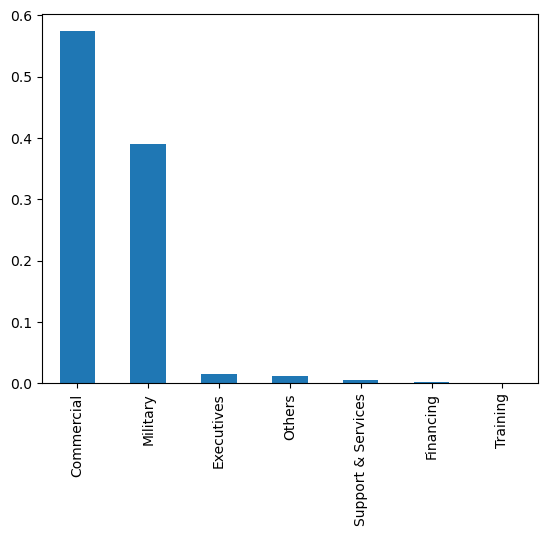

In [20]:
datafile['Article_Type'].value_counts(normalize=True).plot.bar()

In [21]:
import nltk

nltk.download('all')

description = list(datafile['Article.Description'])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/devika/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/devika/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/devika/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/devika/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/devika/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/devika/nltk_data...
[nltk_data]    | Downloading pac

In [25]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(description)):
    r =re.sub('[^a-zA-Z]',' ',description[i])
    r = r.lower()
    r=r.split()
    r=[word for word in r if word not in stopwords.words('english')]
    r=[lemmatizer.lemmatize(word)for word in r]
    r=' '.join(r)
    corpus.append(r)
    
datafile['Article.Description']=corpus

datafile.head()



,Heading,Article.Description,Full_Article,Article_Type
0,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",p helicopter crashed southeast alaska late sep...,<p>The helicopter that crashed in Southeast Al...,Commercial
1,Bell’s Nexus Air Taxi Concept Rings Changes Fo...,p year teasing fledgling electric vertical tak...,<p>A year after teasing the fledgling electric...,Commercial
2,Bell Helicopter Show Air Taxi Nexus,p bell released full size design vertical take...,<p>Bell released the full-size design of the v...,Commercial
3,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,p bell est une soci eacute eacute eacute ricai...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial
4,Les premiers retours d’Olivier Ezratty,p still anecdotal observe explosion passenger ...,<p>It was still anecdotal to observe the explo...,Commercial


In [26]:
#traintestsplit

X=datafile['Article.Description']
y=datafile['Article_Type']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape
X_test.shape

(861,)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_cv,y_train)

X_test_cv = cv.transform(X_test)

prediction = model.predict(X_test_cv)

prediction

/home/devika/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Commercial', 'Commercial', 'Military', 'Commercial', 'Commercial',
       'Military', 'Commercial', 'Commercial', 'Commercial', 'Military',
       'Military', 'Commercial', 'Commercial', 'Commercial', 'Commercial',
       'Commercial', 'Military', 'Commercial', 'Commercial', 'Commercial',
       'Commercial', 'Commercial', 'Military', 'Commercial', 'Military',
       'Military', 'Commercial', 'Military', 'Executives', 'Commercial',
       'Commercial', 'Commercial', 'Commercial', 'Commercial',
       'Commercial', 'Military', 'Commercial', 'Military', 'Commercial',
       'Commercial', 'Military', 'Commercial', 'Military', 'Military',
       'Military', 'Others', 'Military', 'Commercial', 'Commercial',
       'Military', 'Military', 'Military', 'Military', 'Commercial',
       'Commercial', 'Military', 'Military', 'Commercial', 'Military',
       'Commercial', 'Commercial', 'Military', 'Commercial', 'Commercial',
       'Commercial', 'Commercial', 'Commercial', 'Commercial', 'M

In [36]:
from sklearn import metrics

datafiles = pd.DataFrame(metrics.confusion_matrix(y_test,prediction))

In [37]:
datafiles

,0,1,2,3,4,5
0,472,0,19,1,0,0
1,1,8,0,0,0,0
2,26,0,316,0,0,0
3,6,0,0,4,0,0
4,1,0,0,0,6,0
5,0,0,1,0,0,0
